

## Customer Segmentation with Clustering 🛍️

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sns.set_style('whitegrid')

In [ ]:
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

Cloning into 'Datasets'...
remote: Enumerating objects: 347, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 347 (delta 25), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (347/347), 302.89 MiB | 11.00 MiB/s, done.
Resolving deltas: 100% (139/139), done.
Updating files: 100% (245/245), done.


In [ ]:
df = pd.read_csv('/content/Datasets/Mall Dataset/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# In-Depth Exploratory Data Analysis (EDA)

In [ ]:
#remove customer id
df.drop('CustomerID', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# Univariate Analysis (Feature Distributions)

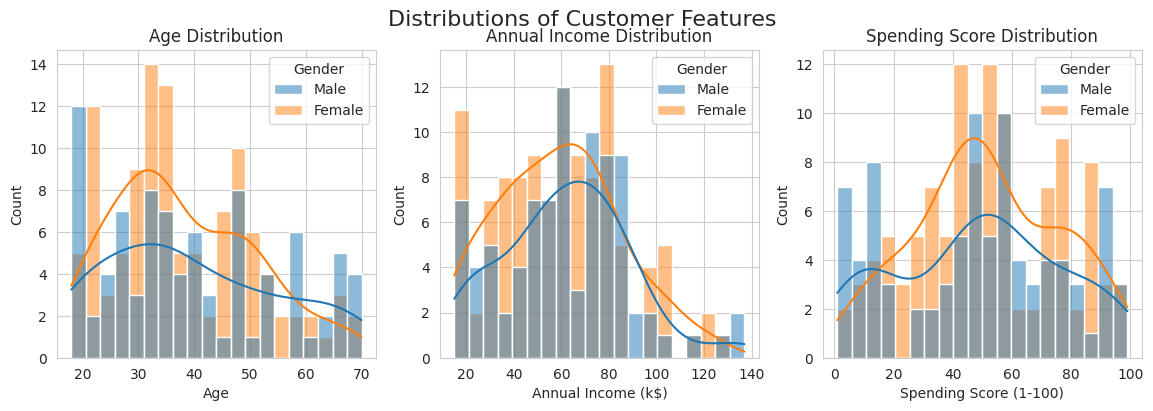

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
fig.suptitle('Distributions of Customer Features', fontsize=16)

sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=20, hue='Gender').set_title('Age Distribution')
sns.histplot(ax=axes[1], data=df, x='Annual Income (k$)', kde=True, bins=20, hue='Gender').set_title('Annual Income Distribution')
sns.histplot(ax=axes[2], data=df, x='Spending Score (1-100)', kde=True, bins=20, hue='Gender').set_title('Spending Score Distribution')

plt.show()

# Insights
1. women are more b/w the ages 30 to 40
2. women have higher annual incomes
3. women have higher spending score

In [ ]:
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


# Bivariate Analysis (Looking for Relationships)

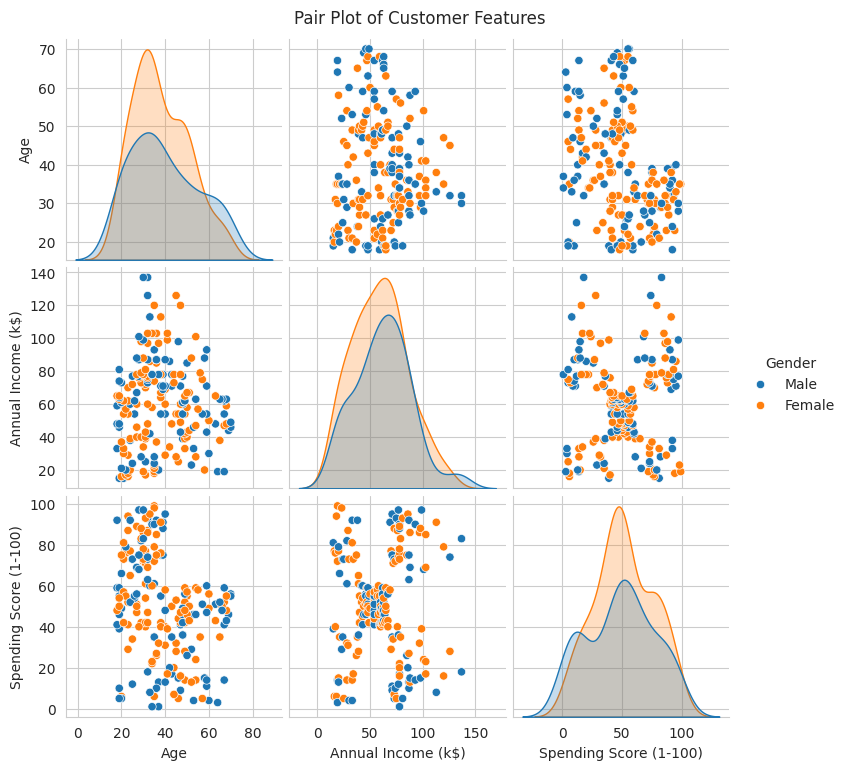

In [ ]:
sns.pairplot(df, vars=['Age','Annual Income (k$)','Spending Score (1-100)'], hue='Gender', diag_kind='kde')
plt.suptitle('Pair Plot of Customer Features', y=1.02)
plt.show()

# Insights
# Clear clusters between--

1.   Annual Income and Spending Score (most)
2.   Spending Score and Age

# Gender is not a good separating factor




# 3D Visualisation ---

In [ ]:
fig = px.scatter_3d(
    df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    z='Age',
    color='Gender',
    title='3d Visual'
)

fig.show()

In [ ]:
sns.histplot(ax=axes[2], data=df, x='Spending Score (1-100)', kde=True, bins=20, hue='Gender').set_title('Spending Score Distribution')
plt.show()


# Elbow Method ---

In [ ]:
# 1. Select & Scale the values
X1 = df[['Annual Income (k$)','Spending Score (1-100)']]
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

In [ ]:
# 2. Implement the Elbow Method
wcss1 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X1_scaled)
    wcss1.append(kmeans.inertia_)

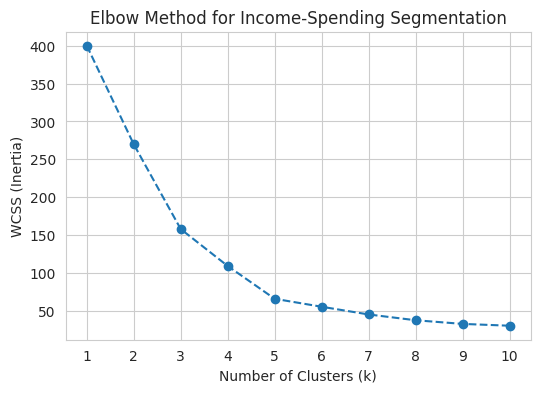

In [ ]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss1, marker='o', linestyle='--')
plt.title('Elbow Method for Income-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

In [ ]:
kmeans1 = KMeans(n_clusters=5,init='k-means++', random_state=42, n_init=10)
df['Income_Cluster'] = kmeans1.fit_predict(X1_scaled)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_Cluster
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


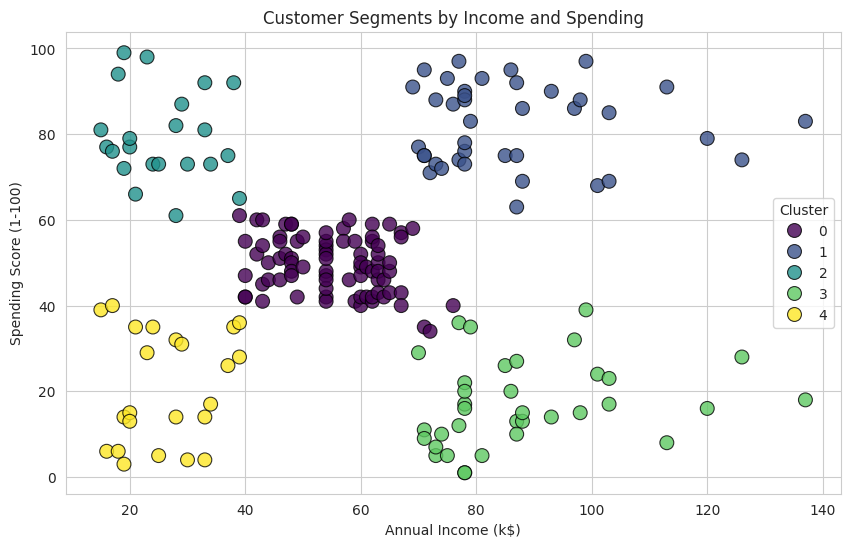

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Income_Cluster', palette='viridis', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Income and Spending')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Quantitative Persona Analysis
cluster_profiles1 = df.groupby('Income_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_profiles1['Size'] = df['Income_Cluster'].value_counts()
print("--- Income-Based Cluster Profiles ---")
cluster_profiles1

--- Income-Based Cluster Profiles ---


,Age,Annual Income (k$),Spending Score (1-100),Size
Income_Cluster,,,,
0,42.72,55.30,49.52,81
1,32.69,86.54,82.13,39
2,25.27,25.73,79.36,22
3,41.11,88.20,17.11,35
4,45.22,26.30,20.91,23


#  New Feature --

In [ ]:
df["Spending_Efficiency"] = df["Spending Score (1-100)"] / df["Annual Income (k$)"]

In [ ]:
features = [
    "Age",
    "Annual Income (k$)",
    "Spending Score (1-100)",
    "Spending_Efficiency"
]
X = df[features]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42, n_init=10)
df["Cluster_New"] = kmeans.fit_predict(X_scaled)

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, df["Income_Cluster"])
print("Silhouette Score:", score)

Silhouette Score: 0.34446247329151786


In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, df["Cluster_New"])
print("Silhouette Score:", score)

Silhouette Score: 0.4104615704755873


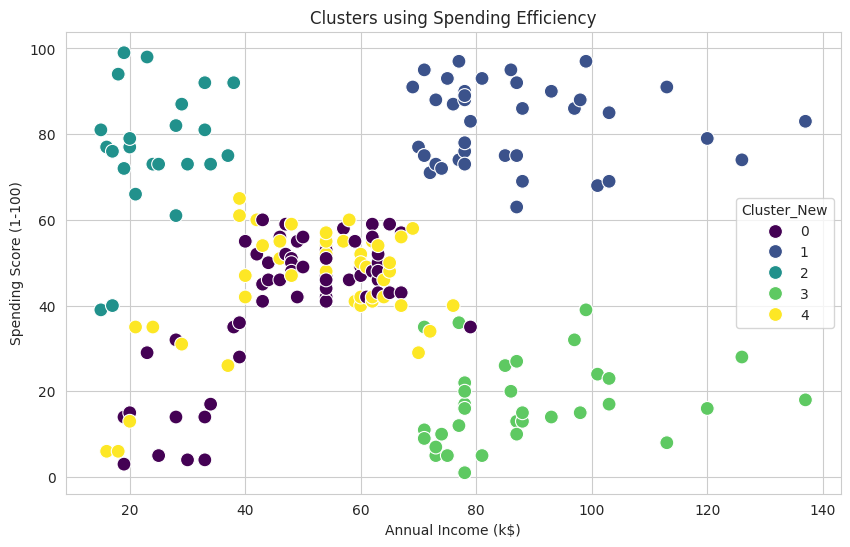

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster_New",
    palette="viridis",
    s=100
)
plt.title("Clusters using Spending Efficiency")
plt.show()

# Insights --
The clusters represent distinct customer segments based on income and spending behavior, enabling targeted marketing strategies for different customer groups.

# Why adding Spending Efficiency helped?
	•	It separated high spenders relative to income
	•	Reduced overlap in the middle region
	•	Made clusters more behavior driven, not just income based

In [ ]:
# Summary statistics by gender
gender_stats = df.groupby("Gender")["Spending Score (1-100)"].describe()
gender_stats

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,51.526786,24.11495,5.0,35.0,50.0,73.0,99.0
Male,88.0,48.511364,27.89677,1.0,24.5,50.0,70.0,97.0


/tmp/ipython-input-2739855829.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




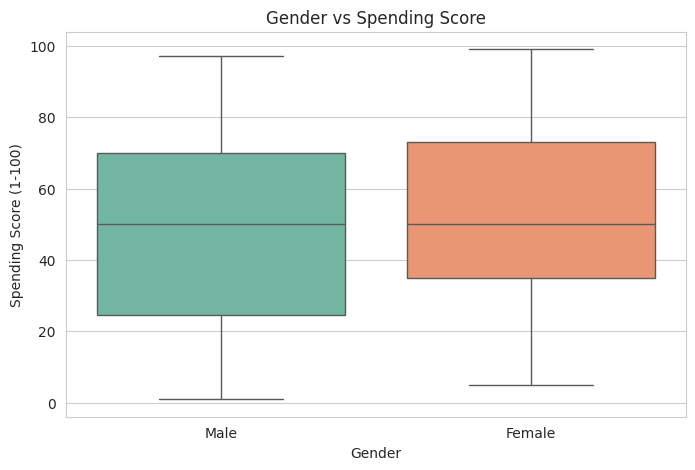

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(
    x="Gender",
    y="Spending Score (1-100)",
    data=df,
    palette="Set2"
)
plt.title("Gender vs Spending Score")
plt.xlabel("Gender")
plt.ylabel("Spending Score (1-100)")
plt.show()

/tmp/ipython-input-3395724993.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




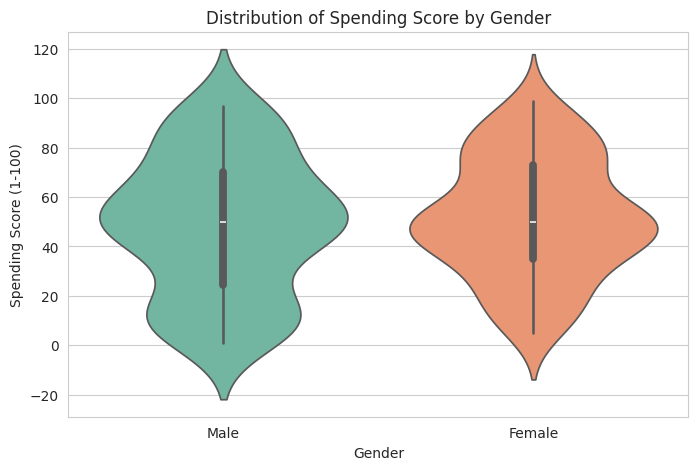

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(
    x="Gender",
    y="Spending Score (1-100)",
    data=df,
    palette="Set2"
)
plt.title("Distribution of Spending Score by Gender")
plt.show()

# Key Findings
	•	Both male and female customers exhibit similar average spending scores.
	•	The distribution and variability of spending behavior is comparable across genders.
	•	No strong evidence suggests that gender alone significantly influences spending habits.
	•	Spending behavior appears to be driven more by income and individual preferences than gender.